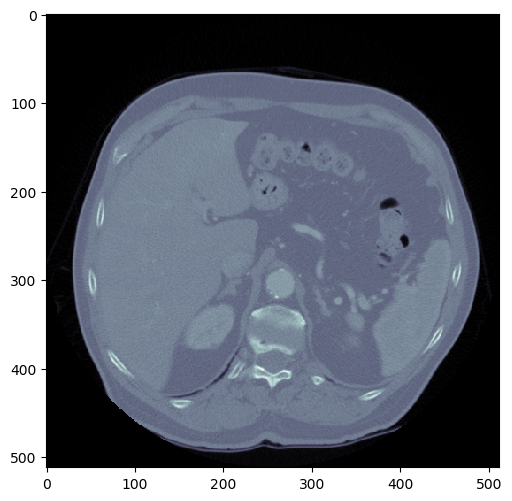

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import pydicom
import scipy.misc
import numpy as np
%matplotlib inline

# Any results you write to the current directory are saved as output.
liver = pydicom.read_file('c:/temp/000074.dcm')

# convert to HounsField Scale
image = np.stack(liver.pixel_array)

# Convert to int16 (from sometimes int16), 
# should be possible as values should always be low enough (<32k)
image = image.astype(np.int16)

# Set outside-of-scan pixels to 1
# The intercept is usually -1024, so air is approximately 0
image[image == -2000] = 0
#image[(image<-500)|(image>500)] = 0

intercept = liver.RescaleIntercept
slope = liver.RescaleSlope
    
if slope != 1:
	image = slope * image.astype(np.float64)
	image = image.astype(np.int16)
        
image += np.int16(intercept)
    
imgs = np.array(image, dtype=np.float64)

plt.figure(figsize = (6,6), dpi=100)
plt.imshow(image, cmap=plt.cm.bone)
plt.figure()
#plt.hist(image, bins=64)
plt.show()

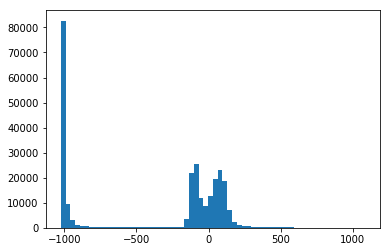

minimum value =  -1024.0
maximum value =  1085.0


In [2]:
plt.hist(imgs.flatten(), bins=64) # calculate a histogram of our image
plt.show() # display that histogram

print("minimum value = ", np.amin(imgs)) # find minimum pixel value in the image array
print("maximum value = ", np.amax(imgs)) # find maximum pixel value in the image array

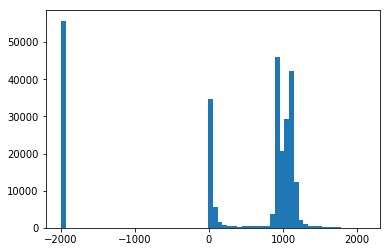

minimum value =  -2000
maximum value =  2109


In [3]:
plt.hist(liver.pixel_array.flatten(), bins=64) # calculate a histogram of our image
plt.show() # display that histogram

print("minimum value = ", np.amin(liver.pixel_array)) # find minimum pixel value in the image array
print("maximum value = ", np.amax(liver.pixel_array)) # find maximum pixel value in the image array

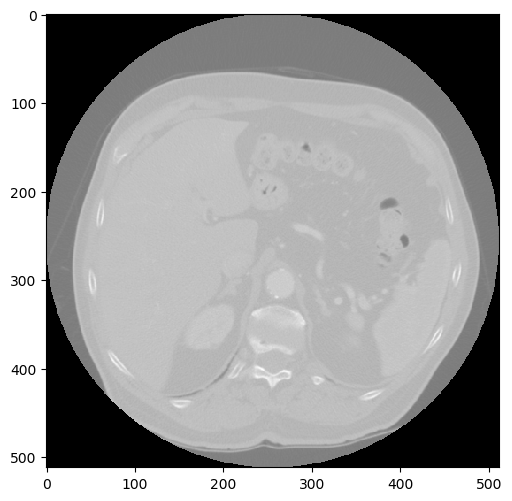

In [4]:
# tell matplotlib to display our images as 6 x 6 inch image, with resolution of 100 dpi
plt.figure(figsize = (6,6), dpi=100) 

# tell matplotlib to display our image, using a gray-scale lookup table.
plt.imshow(liver.pixel_array, cmap=plt.cm.gray) 

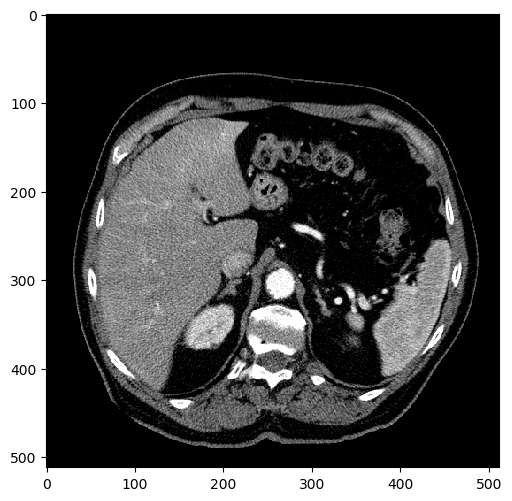

In [7]:
from skimage import exposure, io
p_lo, p_hi = np.percentile(liver.pixel_array, (55, 98.7))
img_rescale = exposure.rescale_intensity(liver.pixel_array, in_range=(p_lo, p_hi))
plt.figure(figsize = (6,6), dpi=100)

figure = plt.imshow(img_rescale, cmap=plt.cm.gray)

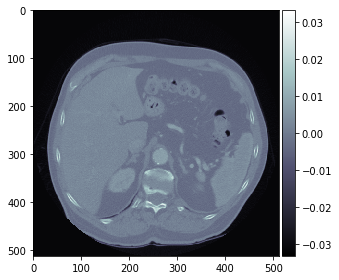

In [8]:
from skimage.restoration import (denoise_wavelet, estimate_sigma)
img_wavelet = denoise_wavelet(image, multichannel=False)
io.imshow(img_wavelet, cmap=plt.cm.bone)

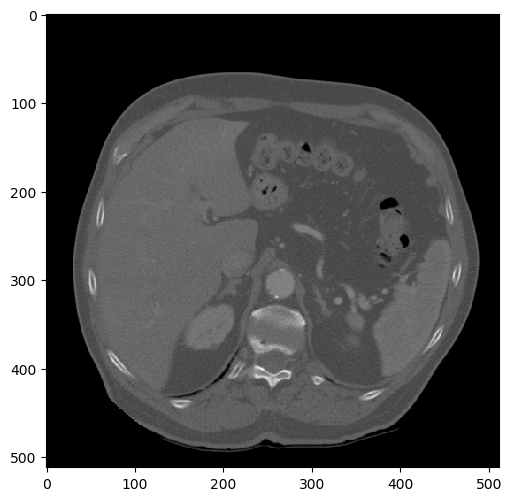

In [9]:
p_lo, p_hi = np.percentile(img_wavelet, (38, 100))
img_rescale = exposure.rescale_intensity(img_wavelet, in_range=(p_lo, p_hi))
plt.figure(figsize = (6,6), dpi=100)
figure = plt.imshow(img_rescale, cmap=plt.cm.gray)

c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\skimage\util\dtype.py:126: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint16.
  .format(dtypeobj_in, dtypeobj_out))
c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from int16 to uint16
  .format(dtypeobj_in, dtypeobj_out))


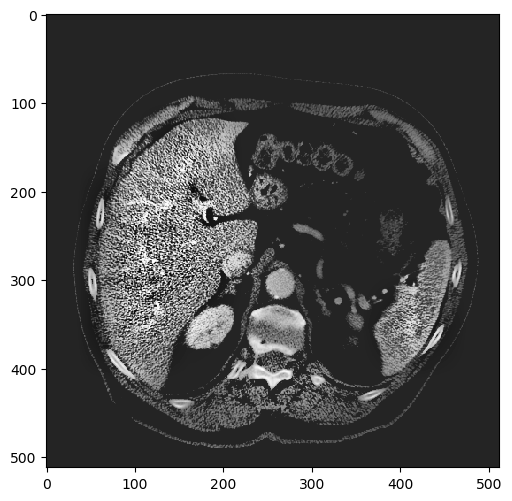

In [10]:
img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.15)
plt.figure(figsize = (6,6), dpi=100)
figure = plt.imshow(img_adapteq, cmap=plt.cm.gray)

In [11]:
print("minimum value = ", np.amin(img_adapteq)) # find minimum pixel value in the image array
print("maximum value = ", np.amax(img_adapteq)) # find maximum pixel value in the image array

minimum value =  0.0
maximum value =  1.0
